In [1]:
import numpy as np
import pandas as pd
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import ExcelWriter

In [3]:
%pwd

'/mnt/d/20191105-confocal_human_islets_coated_with_ADMSCs'

In [4]:
# Get the cvs file list
path = r'.'
filenames = glob.glob(path + "/*/*/*.csv", recursive=True)
[filename for filename in filenames]

['./Oldfolder_Quant_stat/Image2_PKH_Statistics/Image2_PKH_Detailed.csv',
 './Oldfolder_Quant_stat/Image4_PKH_Statistics/Image4_PKH_Detailed.csv',
 './Oldfolder_Quant_stat/Image5_PKH_Statistics/Image5_MSCs_Detailed.csv',
 './Oldfolder_Quant_stat/Image6_PKH_Statistics/Image6_PKH_Detailed.csv',
 './Oldfolder_Quant_stat/Image7_PKH_Statistics/Image7_PKH_Detailed.csv',
 './Oldfolder_Quant_stat/Image9_PKH_Statistics/Image9_PKH_Detailed.csv',
 './Oldfolder_Quant_stat/Image13_DAPI_Statistics/Image13_DAPI_Detailed.csv',
 './Oldfolder_Quant_stat/Image1_DAPI_Statistics/Image1_DAPI_Detailed.csv',
 './Oldfolder_Quant_stat/Image2_DAPI_Statistics/Image2_DAPI_Detailed.csv',
 './Oldfolder_Quant_stat/Image3_DAPI_Statistics/Image3_DAPI_Detailed.csv',
 './Oldfolder_Quant_stat/Image4_DAPI_Statistics/Image4_DAPI_Detailed.csv',
 './Oldfolder_Quant_stat/Image5_DAPI_Statistics/Image5_DAPI_Detailed.csv',
 './Oldfolder_Quant_stat/Image6_DAPI_Statistics/Image6_DAPI_Detailed.csv',
 './Oldfolder_Quant_stat/Image7_DA

In [5]:
# Import csv files to dataframe

lst = []
for filename in filenames:
    df = pd.read_csv(filename, index_col=[5], skiprows=3)
    df['file_name'] = re.search(r'/(.*)/',filename).group(1)
    lst.append(df)

In [6]:
# combine all csv file
df_all = pd.concat(lst, axis=0, ignore_index=True, sort=False)

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = ExcelWriter('pandas_excel.xlsx')

# Write each dataframe to a different worksheet.
df_all.to_excel(writer, sheet_name='all')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

df_all.head()



,Volume,Unit,Category,Time,ID,file_name
0,9.62548,um^3,Surface,1,2,Oldfolder_Quant_stat/Image2_PKH_Statistics
1,719336.00000,um^3,Surface,1,3,Oldfolder_Quant_stat/Image2_PKH_Statistics
2,34.88150,um^3,Surface,1,3,Oldfolder_Quant_stat/Image4_PKH_Statistics
3,22.06410,um^3,Surface,1,4,Oldfolder_Quant_stat/Image4_PKH_Statistics
4,4.98053,um^3,Surface,1,5,Oldfolder_Quant_stat/Image4_PKH_Statistics


In [12]:
#  Create two new columns

df_all['Islet'] = df_all.file_name.apply( lambda x: re.search(r'Image\d+', str(x)).group(0) )
df_all['Measurement'] = df_all.file_name.apply(lambda x: re.search(r'Image\d+_([A-Za-z1-9]+)_', str(x)).group(1))


print(df_all.Measurement.value_counts().sort_index())

df_all.head()

CD31    1610
DAPI      80
PKH      623
Name: Measurement, dtype: int64


,Volume,Unit,Category,Time,ID,file_name,Islet,Measurement
0,9.62548,um^3,Surface,1,2,Oldfolder_Quant_stat/Image2_PKH_Statistics,Image2,PKH
1,719336.00000,um^3,Surface,1,3,Oldfolder_Quant_stat/Image2_PKH_Statistics,Image2,PKH
2,34.88150,um^3,Surface,1,3,Oldfolder_Quant_stat/Image4_PKH_Statistics,Image4,PKH
3,22.06410,um^3,Surface,1,4,Oldfolder_Quant_stat/Image4_PKH_Statistics,Image4,PKH
4,4.98053,um^3,Surface,1,5,Oldfolder_Quant_stat/Image4_PKH_Statistics,Image4,PKH


In [13]:
# Create two more columns

dict = {'Image1':['Day3', "Coated"],
        "Image2":['Day3', 'Coated'], 
        "Image3":['Day3', 'N'], 
        "Image4":['Day3', 'N'], 
        "Image5":['Day5', 'N'],
        "Image6":['Day5', 'N'],
        "Image7":['Day5', 'Coated'],
        "Image9":['Day5', 'Coated'],
        "Image10":['Day0', 'N'],
        "Image11":['Day0', 'N'],
        "Image12":['Day0', 'Coated'],
        "Image13":['Day0', 'Coated'],
        "Image21":['Day0', "Coated"],
        "Image22":['Day0', "Coated"],
        "Image23":['Day0', "Coated"],
        "Image25":['Day0', 'N'],
        "Image26":['Day0', 'N'],
        "Image27":['Day0', 'N'],
        "Image28":['Day3', 'N'],
        "Image29":['Day3', 'N'],
        "Image31":['Day3', 'Coated'],
        "Image32":['Day3', 'Coated'],
        "Image33":['Day3', 'Coated'],
        "Image34":['Day5', 'Coated'],
        "Image35":['Day5', 'Coated'],
        "Image36":['Day5', 'Coated'],
        "Image37":['Day5', 'Coated'],
        "Image38":['Day5', 'N'],
        "Image39":['Day5', 'N'],
        "Image40":['Day5', 'N'],          
       }

df_all['Days'] = df_all.Islet.apply(lambda x: dict[x][0][-1])
df_all['Coating'] = df_all.Islet.apply(lambda x: dict[x][1])

df_all.head()

,Volume,Unit,Category,Time,ID,file_name,Islet,Measurement,Days,Coating
0,9.62548,um^3,Surface,1,2,Oldfolder_Quant_stat/Image2_PKH_Statistics,Image2,PKH,3,Coated
1,719336.00000,um^3,Surface,1,3,Oldfolder_Quant_stat/Image2_PKH_Statistics,Image2,PKH,3,Coated
2,34.88150,um^3,Surface,1,3,Oldfolder_Quant_stat/Image4_PKH_Statistics,Image4,PKH,3,N
3,22.06410,um^3,Surface,1,4,Oldfolder_Quant_stat/Image4_PKH_Statistics,Image4,PKH,3,N
4,4.98053,um^3,Surface,1,5,Oldfolder_Quant_stat/Image4_PKH_Statistics,Image4,PKH,3,N


In [14]:
# Make a pivtot table

df_pivot = pd.pivot_table(df_all, 
                          values = "Volume",
                          index = ["Days", "Coating", "Islet",],
                          columns = ["Measurement"],
                          #margins = True,
                          aggfunc = {'Volume':sum}
)

df_pivot

Measurement                    CD31          DAPI           PKH
Days Coating Islet                                             
0    Coated  Image12   92465.777726  1.119255e+07  4.639720e+06
             Image13  477859.136558  3.305565e+07  2.111930e+07
             Image21     326.763432  1.183760e+07  8.524686e+05
             Image22  193316.562280  4.156504e+06  1.410602e+05
             Image23  514759.531379  7.935062e+06  1.120679e+06
     N       Image10   75795.665660  1.384580e+06  1.819491e+03
             Image11    9374.914452  1.350130e+06  4.494478e+02
             Image25  122830.699169  3.901760e+06  5.696722e+03
             Image26   87449.043190  9.677880e+05  4.358497e+03
             Image27  382907.227571  5.632030e+06  1.179176e+03
3    Coated  Image1   611193.244834  1.489500e+07  3.894359e+06
             Image2   395059.005354  2.805290e+06  7.193456e+05
             Image31    3949.994924  1.687154e+06  1.231456e+05
             Image32    7734.989914  6.708319e+05  1.498267e+04
             Image33   28822.790193           NaN  9.440053e+04
     N       Image28  316492.858810  2.347310e+06  6.261282e+02
             Image29   71948.184607  6.427710e+05  5.163594e+03
             Image3    66195.165730  1.050420e+06  9.480427e+00
             Image4   243520.145090  2.104140e+06  6.192613e+01
5    Coated  Image34  281119.114948  3.697396e+06  1.633612e+05
             Image35   30659.562501  2.000739e+06  9.997598e+04
             Image36  138070.664415  1.630904e+06  1.437352e+05
             Image37  266826.977500  1.686964e+06  1.473947e+05
             Image7   189593.395740  4.170499e+07  1.366462e+07
             Image9    98756.779133  8.844380e+05  5.252442e+04
     N       Image38  675491.478209  7.496701e+06  6.224041e+04
             Image39  306258.533020  4.822557e+06  2.919461e+03
             Image40   54333.822000  2.847700e+05  3.623337e+02
             Image5   695894.299340  5.965884e+06  1.633483e+02
             Image6   269302.057570  2.298645e+06  2.890052e+02

In [15]:
df_pivot.stack()

Days  Coating  Islet    Measurement
0     Coated   Image12  CD31           9.246578e+04
                        DAPI           1.119255e+07
                        PKH            4.639720e+06
               Image13  CD31           4.778591e+05
                        DAPI           3.305565e+07
                                           ...     
5     N        Image5   DAPI           5.965884e+06
                        PKH            1.633483e+02
               Image6   CD31           2.693021e+05
                        DAPI           2.298645e+06
                        PKH            2.890052e+02
Length: 89, dtype: float64

In [16]:
df_flat = pd.DataFrame(df_pivot.to_records())
df_flat.head()

,Days,Coating,Islet,CD31,DAPI,PKH
0,0,Coated,Image12,92465.777726,1.119255e+07,4.639720e+06
1,0,Coated,Image13,477859.136558,3.305565e+07,2.111930e+07
2,0,Coated,Image21,326.763432,1.183760e+07,8.524686e+05
3,0,Coated,Image22,193316.562280,4.156504e+06,1.410602e+05
4,0,Coated,Image23,514759.531379,7.935062e+06,1.120679e+06


In [18]:
df_flat["CD31_percent"] = 100 * df_flat.CD31/df_flat.DAPI
df_flat["MSCs_percent"] = 100 * df_flat.PKH/df_flat.DAPI
df_flat

,Days,Coating,Islet,CD31,DAPI,PKH,CD31_percent,MSCs_percent
0,0,Coated,Image12,92465.777726,1.119255e+07,4.639720e+06,0.826137,41.453659
1,0,Coated,Image13,477859.136558,3.305565e+07,2.111930e+07,1.445620,63.890128
2,0,Coated,Image21,326.763432,1.183760e+07,8.524686e+05,0.002760,7.201364
3,0,Coated,Image22,193316.562280,4.156504e+06,1.410602e+05,4.650942,3.393723
4,0,Coated,Image23,514759.531379,7.935062e+06,1.120679e+06,6.487152,14.123131
5,0,N,Image10,75795.665660,1.384580e+06,1.819491e+03,5.474271,0.131411
6,0,N,Image11,9374.914452,1.350130e+06,4.494478e+02,0.694371,0.033289
7,0,N,Image25,122830.699169,3.901760e+06,5.696722e+03,3.148084,0.146004
8,0,N,Image26,87449.043190,9.677880e+05,4.358497e+03,9.035971,0.450357
9,0,N,Image27,382907.227571,5.632030e+06,1.179176e+03,6.798743,0.020937


In [19]:

df_melt = pd.melt(df_flat,
                  id_vars = ['Days', 'Coating', 'Islet'],
                  var_name = 'Measurement',
                  value_name = 'Volume'
                 ).sort_values(by = ['Days', 'Coating', 'Islet'])
df_melt.head()

,Days,Coating,Islet,Measurement,Volume
0,0,Coated,Image12,CD31,9.246578e+04
30,0,Coated,Image12,DAPI,1.119255e+07
60,0,Coated,Image12,PKH,4.639720e+06
90,0,Coated,Image12,CD31_percent,8.261371e-01
120,0,Coated,Image12,MSCs_percent,4.145366e+01


In [13]:
from pandas import ExcelWriter

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = ExcelWriter('pandas_multiple.xlsx')

# Write each dataframe to a different worksheet.
df_flat.to_excel(writer, sheet_name='flat')
df_melt.to_excel(writer, sheet_name='melt')
df_all.to_excel(writer, sheet_name='all')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [56]:
from pandas import ExcelWriter
def save_xls(dict_df, path):
    """
    Save a dictioinary of dataframes to an excel file , with each dataframe as a separage page
    """
    writer = ExcelWriter(path)
    for key in dict_df:
        dict_df[key].to_excel(writer, key, index = False)
    writer.save()

mydict = {'flat':df_flat, 'all':df_all, 'melt':df_melt}

save_xls(mydict, path='./multiple.xlsx')

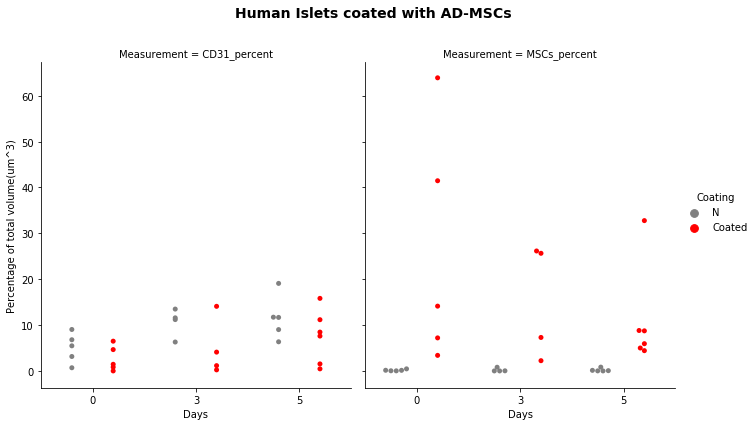

In [119]:
data = df_melt[df_melt['Measurement'].isin(['CD31_percent', 'MSCs_percent'])]  
#sns.set(style="whitegrid")
g = sns.catplot( x="Days", y="Volume", 
                hue='Coating', col='Measurement', 
                kind='swarm',   #['bar', 'strip', 'swarm', 'box', 'violin', 'boxen']
               
                orient='v', height=6, aspect=0.8,
                hue_order=['N', 'Coated'],
                dodge=True,
                data= data,
            
                #palette='muted',
                palette={'Coated':'red', 'N':'grey'})
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Human Islets coated with AD-MSCs', fontsize=14, weight='bold')

# what does axes.flat in matplotlib do?  https://stackoverflow.com/questions/46862861/what-does-axes-flat-in-matplotlib-do
# axis is the axis of the plot(containing ticks and labels); the axes is the area your plot appears in.
axes = g.axes.flatten()  # here axes is a numpy array of axes
axes[0].set_ylabel("Percentage of total volume(um^3)")

#for ax in g.axes.flatten():
#    ax.set_ylabel("Percentage of total volume(um^3)")

data

types_output = ['png', 'eps',  'svg', 'pdf']
for type in types_output:
    g.savefig('output.'+ type, format=type)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


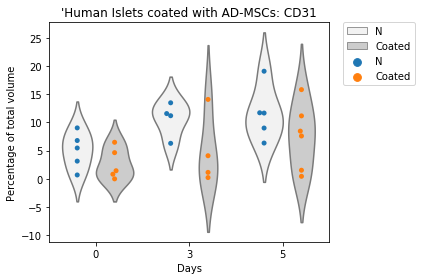

In [36]:
data = df_melt[df_melt['Measurement'].isin(['CD31_percent'])] 

ax, fig = plt.subplots()
ax = sns.violinplot(x="Days", y="Volume", hue='Coating', hue_order=['N', 'Coated'], color='.8', inner=None, data=data)
sns.swarmplot(x="Days", y="Volume", hue='Coating', hue_order=['N', 'Coated'], dodge=True, data=data, ax=ax)

ax.set_title("'Human Islets coated with AD-MSCs: CD31")
ax.set_ylabel("Percentage of total volume")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

types_output = ['png', 'eps',  'svg', 'pdf']
for type in types_output:
    ax.figure.savefig('CD31_Percentage.'+ type, format=type)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


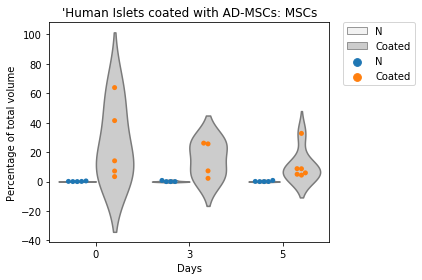

In [35]:
# Seaborn stripplot with violin plot bars in front of points 
#https://stackoverflow.com/questions/55797760/seaborn-stripplot-with-violin-plot-bars-in-front-of-points

data = df_melt[df_melt['Measurement'].isin(['MSCs_percent'])] 

#ax = sns.boxplot(x="Days", y="Volume", hue='Coating', hue_order=['N', 'Coated'], color='.8', data=data)
#sns.swarmplot(x="Days", y="Volume", hue='Coating', hue_order=['N', 'Coated'], dodge=True, data=data, ax=ax)

ax = sns.violinplot(x="Days", y="Volume", hue='Coating', hue_order=['N', 'Coated'], color='.8', inner=None, scale='count', data=data)
sns.swarmplot(x="Days", y="Volume", hue='Coating', hue_order=['N', 'Coated'], dodge=True, data=data, ax=ax)


ax.set_title("'Human Islets coated with AD-MSCs: MSCs")
ax.set_ylabel("Percentage of total volume")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

types_output = ['png', 'eps',  'svg', 'pdf']

for type in types_output:
    plt.savefig('MSC-PKH26_Percentage.'+ type, format=type)
